In [1]:
import numpy as np
import scipy as sci
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigs
import scipy.special as sp
import matplotlib.pyplot as plt
#from sympy import symbols
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import plot,xlabel,ylabel,legend,show
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')
import qutip as qt

/usr/lib/python3/dist-packages/pythran/tables.py:4520: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, method):
/usr/lib/python3/dist-packages/pythran/tables.py:4553: FutureWarning: In the future `np.bytes` will be defined as the corresponding NumPy scalar.
  obj = getattr(themodule, elem)


# SNAIL KERR CAT

In [2]:
om0 = 1
g3 = 0.00075;
g4 = 40.27*10**(-7)
K = 1.685 * 10**(-6)
wd = 2.0
T = 4*np.pi/wd

In [3]:
M=30;
Od = np.linspace(0,0.13,M)

In [4]:
N=110
a=qt.destroy(N)
adag = a.dag()

In [5]:
q_energies = np.zeros((len(Od), N));
ad3 = (a+adag) * (a+adag) * (a+adag) 
ad4 = (a+adag) * (a+adag) * (a+adag) * (a+adag)
for idx, k in enumerate(Od):
    H0= om0 * adag * a + (g3/3) * ad3 + (g4/4) * ad4
    H1= - (1j*k)*(a-adag)
    H = [H0, [H1, "cos({w}*t)".format(w=wd)]]
    fbasis = qt.FloquetBasis(H, T, sort="high")
    f_energies2 = fbasis.e_quasi
    q_energies[idx,:] = f_energies2

/home/dominic/.local/lib/python3.10/site-packages/qutip/solver/integrator/scipy_integrator.py:80: SparseEfficiencyWarning: Constructing a DIA matrix with 110 diagonals is inefficient
  state0 = _data.column_stack(state0)


In [6]:
font_size=20
label_size=30
title_font=30

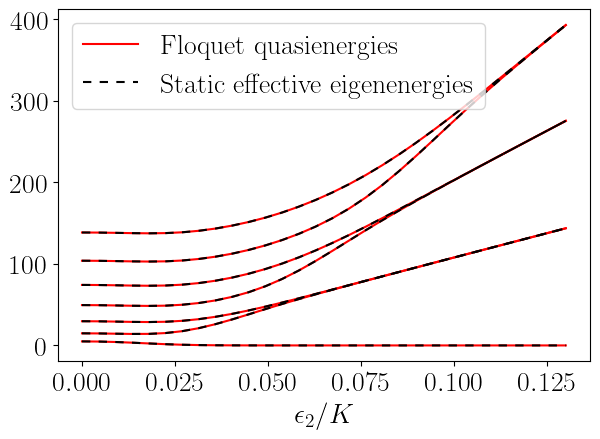

In [7]:
plt.rc('font', family='serif', size=font_size)
plt.plot(Od,(q_energies[:,1]-q_energies[:,0])/K,color='r',label='Floquet quasienergies')
plt.plot(Od,(q_energies[:,2]-q_energies[:,0])/K,color='r')
plt.plot(Od,(q_energies[:,3]-q_energies[:,0])/K,color='r')
plt.plot(Od,(q_energies[:,4]-q_energies[:,0])/K,color='r')
plt.plot(Od,(q_energies[:,5]-q_energies[:,0])/K,color='r')
plt.plot(Od,(q_energies[:,6]-q_energies[:,0])/K,color='r')
plt.plot(Od,(q_energies[:,7]-q_energies[:,0])/K,color='r')

plt.plot(Od,(q_energies[:,1]-q_energies[:,0])/K,color='k',linestyle='--',dashes=(4,4),label='Static effective eigenenergies')
plt.plot(Od,(q_energies[:,2]-q_energies[:,0])/K,color='k',linestyle='--',dashes=(4,4))
plt.plot(Od,(q_energies[:,3]-q_energies[:,0])/K,color='k',linestyle='--',dashes=(4,4))
plt.plot(Od,(q_energies[:,4]-q_energies[:,0])/K,color='k',linestyle='--',dashes=(4,4))
plt.plot(Od,(q_energies[:,5]-q_energies[:,0])/K,color='k',linestyle='--',dashes=(4,4))
plt.plot(Od,(q_energies[:,6]-q_energies[:,0])/K,color='k',linestyle='--',dashes=(4,4))
plt.plot(Od,(q_energies[:,7]-q_energies[:,0])/K,color='k',linestyle='--',dashes=(4,4))
plt.xlabel(r'$\epsilon_2/K$')
plt.legend()
plt.tight_layout()
plt.savefig("SNAIL_floquet_quasi.pdf")



(-75.57587821134496, 200.0)

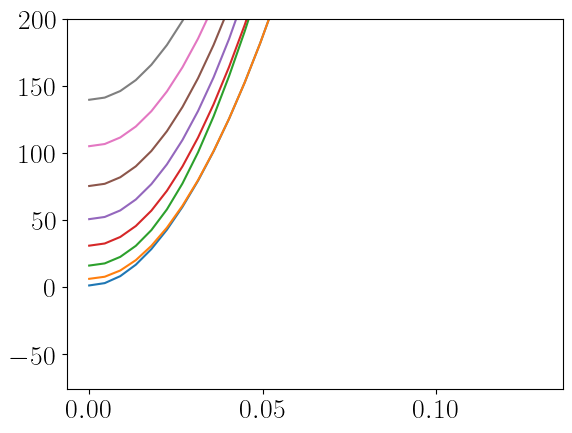

In [8]:
plt.plot(Od,(q_energies[:,0])/K)
plt.plot(Od,(q_energies[:,1])/K)
plt.plot(Od,(q_energies[:,2])/K)
plt.plot(Od,(q_energies[:,3])/K)
plt.plot(Od,(q_energies[:,4])/K)
plt.plot(Od,(q_energies[:,5])/K)
plt.plot(Od,(q_energies[:,6])/K)
plt.plot(Od,(q_energies[:,7])/K)
plt.ylim(ymax=200)

# STS Kerr CAT

In [9]:
eC = 1;
K2 = (1.25/12.65)*10**(-3);
G2S = 2/12.65;
G4S = (0.4/12.65) * 10**(-3);

wd2 = 2.0*eC;
T2 = 4*np.pi/wd2

M2=50;
N2=55;
Od2 = np.linspace(0, 0.018, M2)
a2 = qt.destroy(N2)
a2dag = a2.dag()

In [10]:
eC = 1;
K2 = (3.0/6)*10**(-3);
G2S = 0.1/6;
G4S = (0.4/6) * 10**(-4);

wd2 = 2.0*eC;
T2 = 4*np.pi/wd2

M2=50;
N2=27;
Od2 = np.linspace(0, 0.35, M2)
a2 = qt.destroy(N2)
a2dag = a2.dag()

In [11]:
q_energies2 = np.zeros((len(Od2), N2));
a2d2 = (a2 + a2dag) * (a2 + a2dag)
a2d4 = (a2 + a2dag) * (a2 + a2dag) * (a2 + a2dag) * (a2 + a2dag)
for idx, k in enumerate(Od2):
    H02 = (eC * a2dag * a2 - K2 * a2dag * a2dag * a2 * a2)
    H12 = (2 * k * G2S * a2d2) - 2 * k * G4S * a2d4
    H2 = [H02, [H12, "cos({w2}*t)".format(w2=wd2)]]
    fbasis2 = qt.FloquetBasis(H2, T2, sort="high")
    f_energies = fbasis2.e_quasi
    q_energies2[idx,:] = f_energies

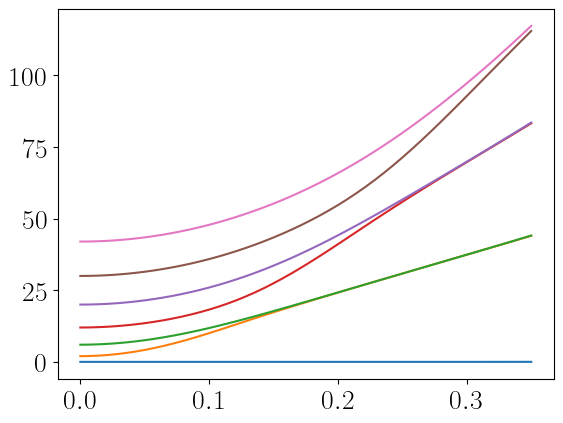

In [12]:
plt.plot(Od2,-(q_energies2[:,-2]-q_energies2[:,-1])/K2)
plt.plot(Od2,-(q_energies2[:,-3]-q_energies2[:,-1])/K2)
plt.plot(Od2,-(q_energies2[:,-4]-q_energies2[:,-1])/K2)
plt.plot(Od2,-(q_energies2[:,-5]-q_energies2[:,-1])/K2)
plt.plot(Od2,-(q_energies2[:,-6]-q_energies2[:,-1])/K2)
plt.plot(Od2,-(q_energies2[:,-7]-q_energies2[:,-1])/K2)
plt.plot(Od2,-(q_energies2[:,-8]-q_energies2[:,-1])/K2)

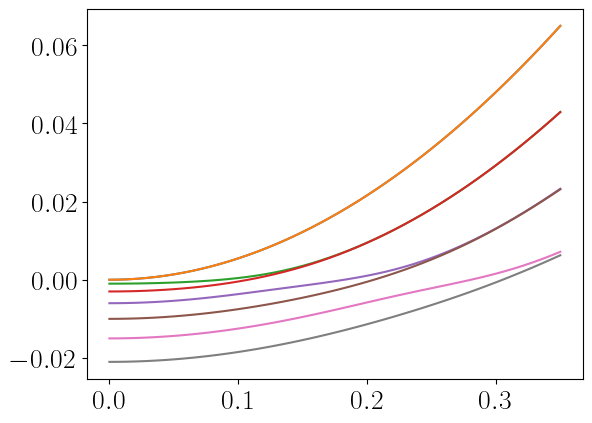

In [13]:
plt.plot(Od2,(q_energies2[:,-1]))
plt.plot(Od2,(q_energies2[:,-2]))
plt.plot(Od2,(q_energies2[:,-3]))
plt.plot(Od2,(q_energies2[:,-4]))
plt.plot(Od2,(q_energies2[:,-5]))
plt.plot(Od2,(q_energies2[:,-6]))
plt.plot(Od2,(q_energies2[:,-7]))
plt.plot(Od2,(q_energies2[:,-8]))